In [1]:
# Import the libraries
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
%store -r consumerKey
%store -r consumerSecret
%store -r accessToken
%store -r accessTokenSecret

no stored variable or alias consumerKey
no stored variable or alias consumerSecret
no stored variable or alias accessToken
no stored variable or alias accessTokenSecret


In [3]:
keys = pd.read_csv("keys.csv")

In [ ]:
#keys['key']

In [4]:
consumerKey = keys['key'][0]
consumerSecret = keys['key'][1]
accessToken = keys['key'][2]
accessTokenSecret = keys['key'][3]

In [5]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [6]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="Chumbak", count = 100, lang ="en", tweet_mode="extended")

In [7]:
#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) Hey guys! Follow us on Instagram to keep up with the latest  on Chumbak. Write to us at help@chumbak.in or call us on our toll-free number 1-800-420-1200 to get in touch!

2) Add a bit of texture and character to corners with our latest Home Collection - Jungle Fiesta, Inspired by Gondh Tribal Art. 
Shop now : https://t.co/CVoRFiCtow
#JungleFiesta https://t.co/lymFERv9DT

3) Coming soon ♥️
•
#Chumbak #MakeHappy #AlittleLoveIsAllWeNeed https://t.co/XehnqkKU5i

4) Get the 'Girl Next Door, Who Goes to College and Plans to Rule the World's Look! Tap the image to get it! https://t.co/dmE96HhSso

5) We collaborated with Mumbai-based influencer @snehalkarkeraofficial kalkera for our Streets of India campaign! •
Stay tuned #RepublicDay. https://t.co/QyfDbVYZGS



In [9]:
pd.options.display.max_colwidth = 300

# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,Hey guys! Follow us on Instagram to keep up with the latest on Chumbak. Write to us at help@chumbak.in or call us on our toll-free number 1-800-420-1200 to get in touch!
1,"Add a bit of texture and character to corners with our latest Home Collection - Jungle Fiesta, Inspired by Gondh Tribal Art. \nShop now : https://t.co/CVoRFiCtow\n#JungleFiesta https://t.co/lymFERv9DT"
2,Coming soon ♥️\n•\n#Chumbak #MakeHappy #AlittleLoveIsAllWeNeed https://t.co/XehnqkKU5i
3,"Get the 'Girl Next Door, Who Goes to College and Plans to Rule the World's Look! Tap the image to get it! https://t.co/dmE96HhSso"
4,We collaborated with Mumbai-based influencer @snehalkarkeraofficial kalkera for our Streets of India campaign! •\nStay tuned #RepublicDay. https://t.co/QyfDbVYZGS


In [11]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 text = emoji_pattern.sub(r'', text) # Removing emoji
 return text

In [10]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

In [12]:
# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

In [13]:
pd.options.display.max_colwidth = 300
# Show the cleaned tweets
df

,Tweets
0,Hey guys! Follow us on Instagram to keep up with the latest on Chumbak. Write to us at help.in or call us on our toll-free number 1-800-420-1200 to get in touch!
1,"Add a bit of texture and character to corners with our latest Home Collection - Jungle Fiesta, Inspired by Gondh Tribal Art. \nShop now : \nJungleFiesta"
2,Coming soon ♥️\n•\nChumbak MakeHappy AlittleLoveIsAllWeNeed
3,"Get the 'Girl Next Door, Who Goes to College and Plans to Rule the World's Look! Tap the image to get it!"
4,We collaborated with Mumbai-based influencer kalkera for our Streets of India campaign! •\nStay tuned RepublicDay.
...,...
95,Thank you for all the love 4384.\nUpload pictures of your favourite Chumbak products with Chumbak &amp; MakeHappy and we'll the best :)
96,Both of them are loving our brand new SS18 collection. Time for you to take our clothes for a ride now! Walk into your nearest store and check out why we are loving our collection this season.
97,The weekend is here! Phew! And our Mid Season Sale is here to add more cheer. Get shopping now! \nsale makehappy blue browns shopChumbak Chumbak salealert discount shoppingspree footwear accessories instagood giftideas
98,"Bestseller back in stock. \nGrab this favourite before time runs out. \nClick the link on our Instagram profile for price, details and to shop.\nShopChumbak Chumbak MakeHappy fashionbychumbak watches accessories accessoryaddict watchlover watchesfo…"


In [14]:

# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

In [15]:
# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [16]:
# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,Hey guys! Follow us on Instagram to keep up with the latest on Chumbak. Write to us at help.in or call us on our toll-free number 1-800-420-1200 to get in touch!,0.900000,0.625000
1,"Add a bit of texture and character to corners with our latest Home Collection - Jungle Fiesta, Inspired by Gondh Tribal Art. \nShop now : \nJungleFiesta",0.900000,0.500000
2,Coming soon ♥️\n•\nChumbak MakeHappy AlittleLoveIsAllWeNeed,0.000000,0.000000
3,"Get the 'Girl Next Door, Who Goes to College and Plans to Rule the World's Look! Tap the image to get it!",0.000000,0.000000
4,We collaborated with Mumbai-based influencer kalkera for our Streets of India campaign! •\nStay tuned RepublicDay.,0.000000,0.000000
...,...,...,...
95,Thank you for all the love 4384.\nUpload pictures of your favourite Chumbak products with Chumbak &amp; MakeHappy and we'll the best :),0.633333,0.666667
96,Both of them are loving our brand new SS18 collection. Time for you to take our clothes for a ride now! Walk into your nearest store and check out why we are loving our collection this season.,0.784848,0.456818
97,The weekend is here! Phew! And our Mid Season Sale is here to add more cheer. Get shopping now! \nsale makehappy blue browns shopChumbak Chumbak salealert discount shoppingspree footwear accessories instagood giftideas,0.200000,0.208333
98,"Bestseller back in stock. \nGrab this favourite before time runs out. \nClick the link on our Instagram profile for price, details and to shop.\nShopChumbak Chumbak MakeHappy fashionbychumbak watches accessories accessoryaddict watchlover watchesfo…",0.000000,0.000000


In [17]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

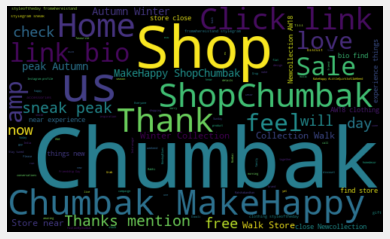

In [18]:
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'

In [20]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Hey guys! Follow us on Instagram to keep up with the latest on Chumbak. Write to us at help.in or call us on our toll-free number 1-800-420-1200 to get in touch!,0.900000,0.625000,Positive
1,"Add a bit of texture and character to corners with our latest Home Collection - Jungle Fiesta, Inspired by Gondh Tribal Art. \nShop now : \nJungleFiesta",0.900000,0.500000,Positive
2,Coming soon ♥️\n•\nChumbak MakeHappy AlittleLoveIsAllWeNeed,0.000000,0.000000,Neutral
3,"Get the 'Girl Next Door, Who Goes to College and Plans to Rule the World's Look! Tap the image to get it!",0.000000,0.000000,Neutral
4,We collaborated with Mumbai-based influencer kalkera for our Streets of India campaign! •\nStay tuned RepublicDay.,0.000000,0.000000,Neutral
...,...,...,...,...
95,Thank you for all the love 4384.\nUpload pictures of your favourite Chumbak products with Chumbak &amp; MakeHappy and we'll the best :),0.633333,0.666667,Positive
96,Both of them are loving our brand new SS18 collection. Time for you to take our clothes for a ride now! Walk into your nearest store and check out why we are loving our collection this season.,0.784848,0.456818,Positive
97,The weekend is here! Phew! And our Mid Season Sale is here to add more cheer. Get shopping now! \nsale makehappy blue browns shopChumbak Chumbak salealert discount shoppingspree footwear accessories instagood giftideas,0.200000,0.208333,Positive
98,"Bestseller back in stock. \nGrab this favourite before time runs out. \nClick the link on our Instagram profile for price, details and to shop.\nShopChumbak Chumbak MakeHappy fashionbychumbak watches accessories accessoryaddict watchlover watchesfo…",0.000000,0.000000,Neutral


In [ ]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

In [ ]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

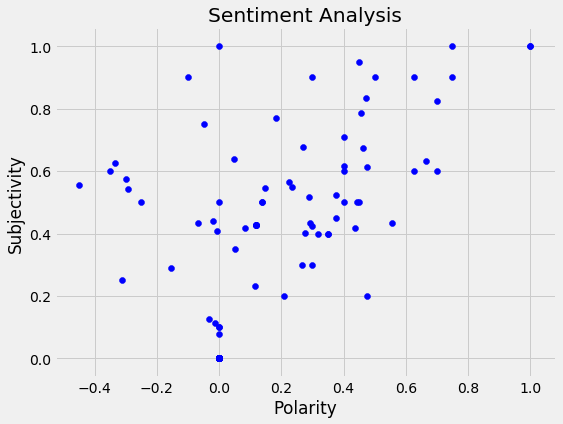

In [21]:
# Plotting
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
 plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') # plt.scatter(x,y,color)
 
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [22]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

54.0

In [23]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

15.0

In [24]:

# Show the value counts
df['Analysis'].value_counts()

Positive    54
Neutral     31
Negative    15
Name: Analysis, dtype: int64

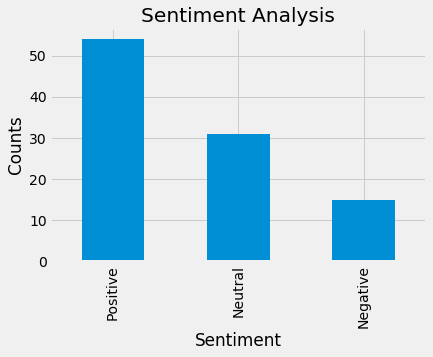

In [25]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()